<a href="https://colab.research.google.com/github/aarnavg17/CityU-Assignments/blob/master/Change%20the%20Code/CTC_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the tensorflow library
import tensorflow as tf
 
#load the mnist dataset which contains the data for handwritten digits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Run this code to visualize any image from the dataset, by changing the image_index as you want

The original number of the image is:  7


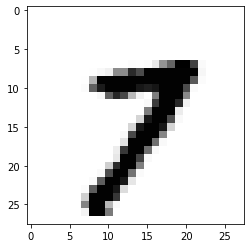

In [ ]:
import matplotlib.pyplot as plt

image_index = 40000 # You may select anything up to 60,000

print("The original number of the image is: ",y_train[image_index]) # The label is 7

plt.imshow(x_train[image_index], cmap='Greys') #code to show the image

In [ ]:
#y_train are the real values of the images. (0-9)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### We have to clean the images, to be compatible with the library

In [ ]:
import keras

x_train = x_train/255  #from the slides, each pixel is a number between 0-255. So, we divide each pixel with 255, so that all pixel values are between (0-1)

In [ ]:
#all the pixel values are between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### We build our own NN model (you need to fill in code here)

#### Gaining insights from the network mentioned in our presentation:
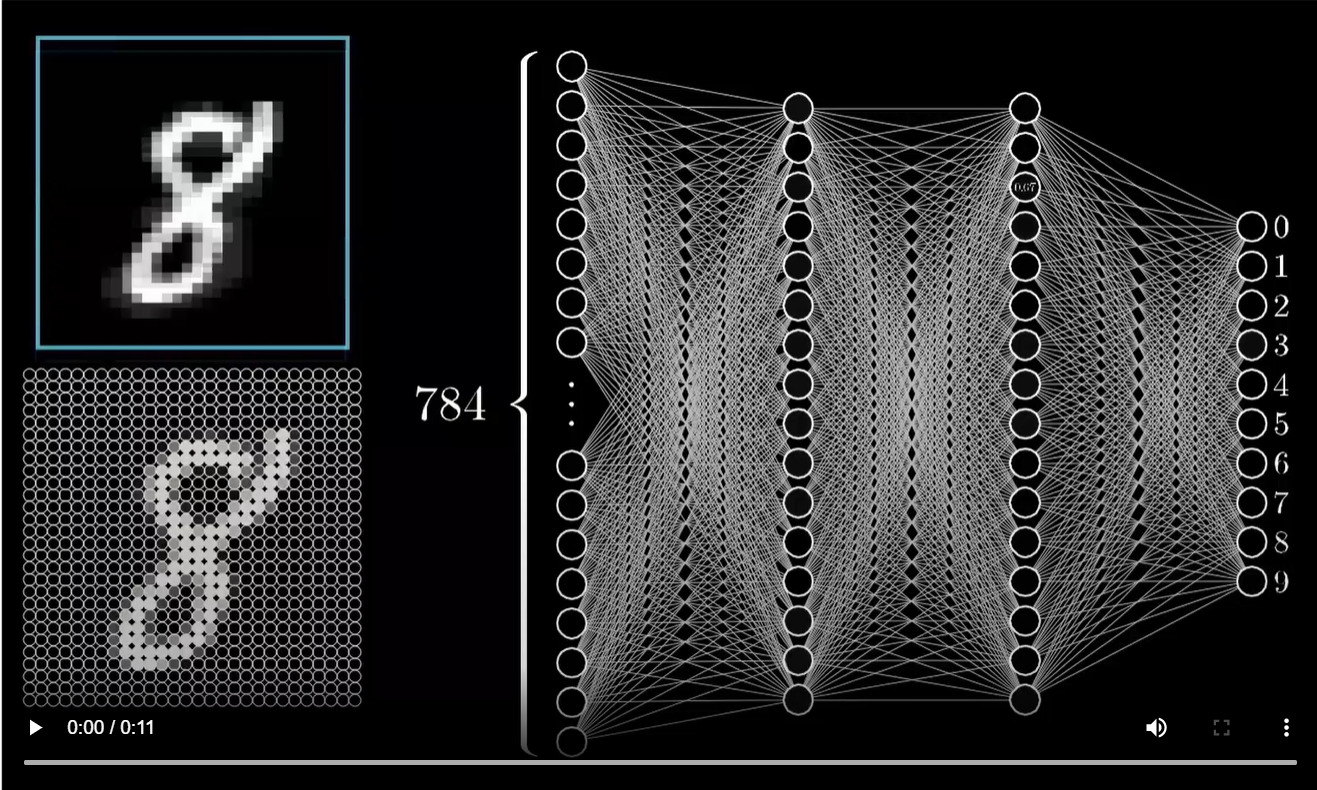
we will be having 2 hidden layers as well. But this time, I chose 128 neurons in the first layer, and 64 neurons in the second layer.
The last layer woudl contain 10 neurons instead of 1, because we have 10 numbers to classify.

In [ ]:

from keras.layers import Dense,Flatten # Dense layers are "fully connected" layers
from keras.models import Sequential 

num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256, activation='relu'))

model.add(Dense(64, activation='relu'))


model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### We compile the model with the required optimizer, and loss functions

In [ ]:
#there is a loss (the difference between the predicted number by your program and the original number) for all the images.
#the goal of our program is to reduce this loss, and increase our accuracy (percentage of correct prediction)
#so, we use a helper called an optimizer (adam), which would reduce our error (sparse categorical cross entropy) and increase our accuracy

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

#lastly we give the data to the program.
#epochs = 5 means that it, the program needs to run 5 times. Hoping that, after each time, it learn something new
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3728 - accuracy: 0.8925
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906 - accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0307 - accuracy: 0.9900


### We evaluate on test data (just run the next cell)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 16.6218 - accuracy: 0.9754


[16.621845245361328, 0.9753999710083008]

### Check how it predicts for any image. (just run the next cell by changing the index

The number predicted by our code: 
1
The original image:


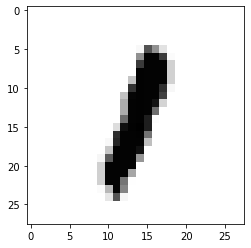

In [ ]:
#change this index to any other number.
image_index = 1729

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The number predicted by our code: ")
print(pred.argmax())


print("The original image:")